In [11]:
!pip install --upgrade pip
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
  Found existing installation: pip 8.1.1
    Uninstalling pip-8.1.1:
      Successfully uninstalled pip-8.1.1
  Using cached matplotlib-3.0.3-cp35-cp35m-manylinux1_x86_64.whl (13.0 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.1.0-cp35-cp35m-manylinux1_x86_64.whl (90 kB)
     |████████████████████████████████| 67 kB 6.0 MB/s  eta 0:00:01


In [12]:
import numpy as np
import dlib
import cv2
import argparse
import os
from image_utility import save_image, generate_random_color, draw_border
from imutils import face_utils

import matplotlib.pyplot as plt

In [58]:
def hog_landmarks(image, gray):
    faces_hog = face_detector(gray, 1)

    # HOG + SVN
    facial_points = []
    for (i, face) in enumerate(faces_hog):
        # Finding points for rectangle to draw on face
        x, y, w, h = face.left(), face.top(), face.width(), face.height()

        # Drawing simple rectangle around found faces
        #cv2.rectangle(image, (x, y), (x + w, y + h), generate_random_color(), 2)

        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, face)
        shape = face_utils.shape_to_np(shape)

        # Draw on our image, all the finded cordinate points (x,y)
#         for (x, y) in shape:
#             cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
            
        facial_points += [shape]
    
    return facial_points
            
def face_detection(image):

    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # The 1 in the second argument indicates that we should upsample the image
    # 1 time. This will make everything bigger and allow us to detect more
    # faces.

    # write at the top left corner of the image
    img_height, img_width = image.shape[:2]
    if model == 'hog':
        facial_points = hog_landmarks(image, gray)
    elif model == 'cnn':
        cnn_landmarks(image, gray)
    else:
        dl_landmarks(image, gray, img_height, img_width)

    #save_image(image)
    return facial_points

In [59]:
WEIGHTS = './shape_predictor_68_face_landmarks.dat'
MODEL = 'hog'

In [60]:
face_detector = dlib.get_frontal_face_detector()

model = MODEL
predictor = dlib.shape_predictor(WEIGHTS)

In [206]:
img = 'pg_1.jpg'
image = cv2.imread(img)

In [207]:
# plt.imshow(image[:, :, [2, 1, 0]]) # BGR
# plt.show()

In [208]:
landmarks = face_detection(image)

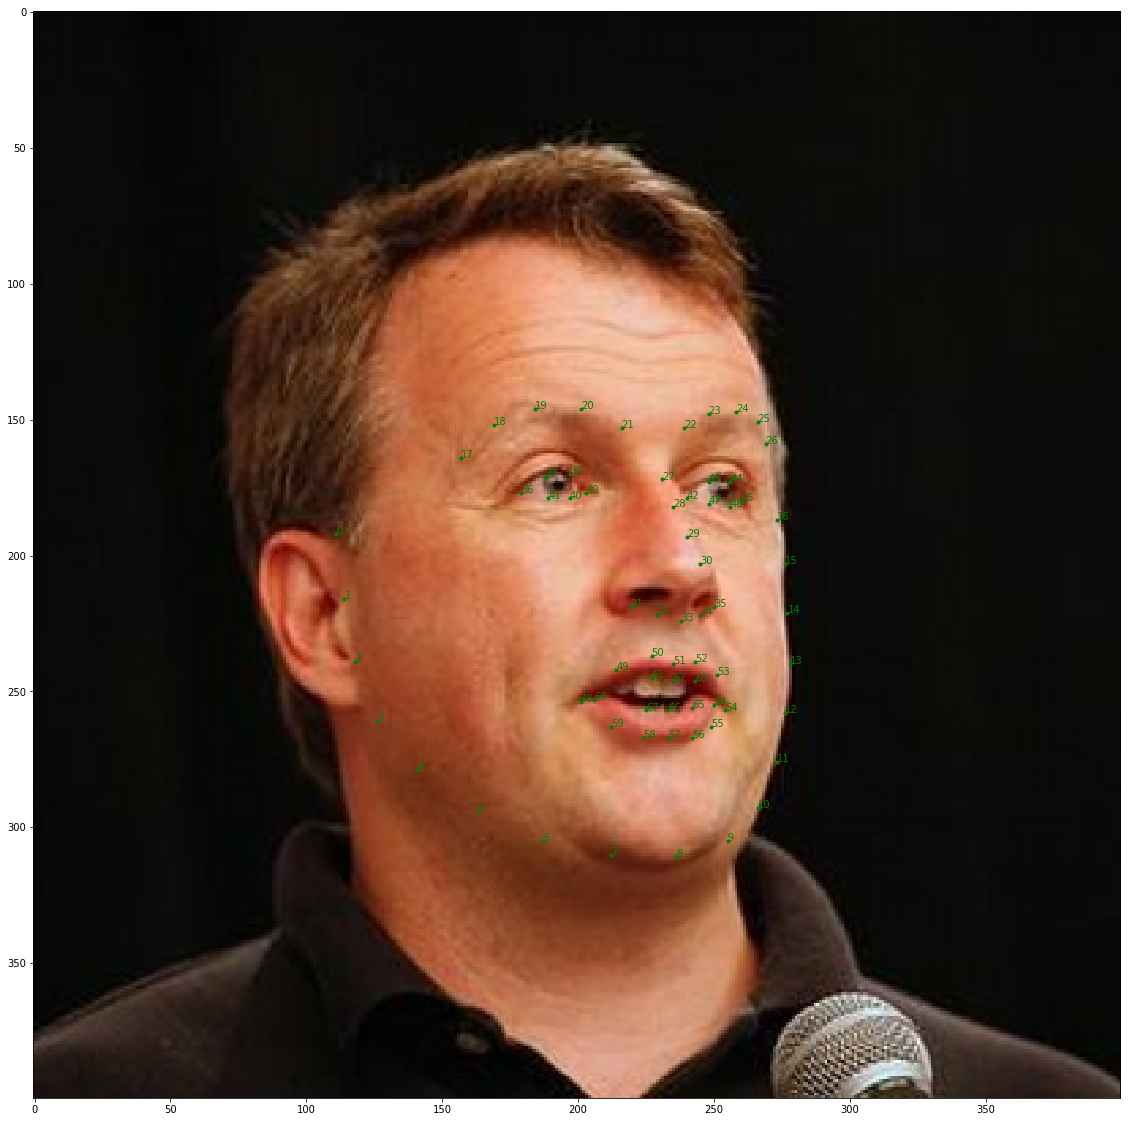

In [209]:
plt.figure(figsize=(20,20))
plt.imshow(image[:, :, [2, 1, 0]]) # BGR

for i, (x,y) in enumerate(landmarks[0]):
    plt.plot(x,y, '.g')
    plt.text(x,y, str(i), color='g')
    
plt.show()

In [210]:

def build_mask(lm):
    left_jaw = lm[np.arange(0,8+1),:]
    right_jaw = lm[np.arange(9,17), :]

    right_cheekbone = [0.6*lm[25] + 0.4*lm[11], 
                        0.4*lm[23] + 0.6*lm[53]]

    left_cheekbone = [0.4*lm[20] + 0.6*lm[49],
                      0.6*lm[18] + 0.4*lm[4]]
    nose = lm[[29, 30]]
    lips = lm[[51,62, 66,57]]
    chin = lm[8]


    right_mask = np.vstack([
        right_jaw,
        right_cheekbone,
        nose,
        lips,
        chin
    ])

    left_mask = np.vstack([
        chin,
        np.flipud(lips),
        np.flipud(nose),
        left_cheekbone,
        left_jaw
    ])
    
    return left_mask, right_mask

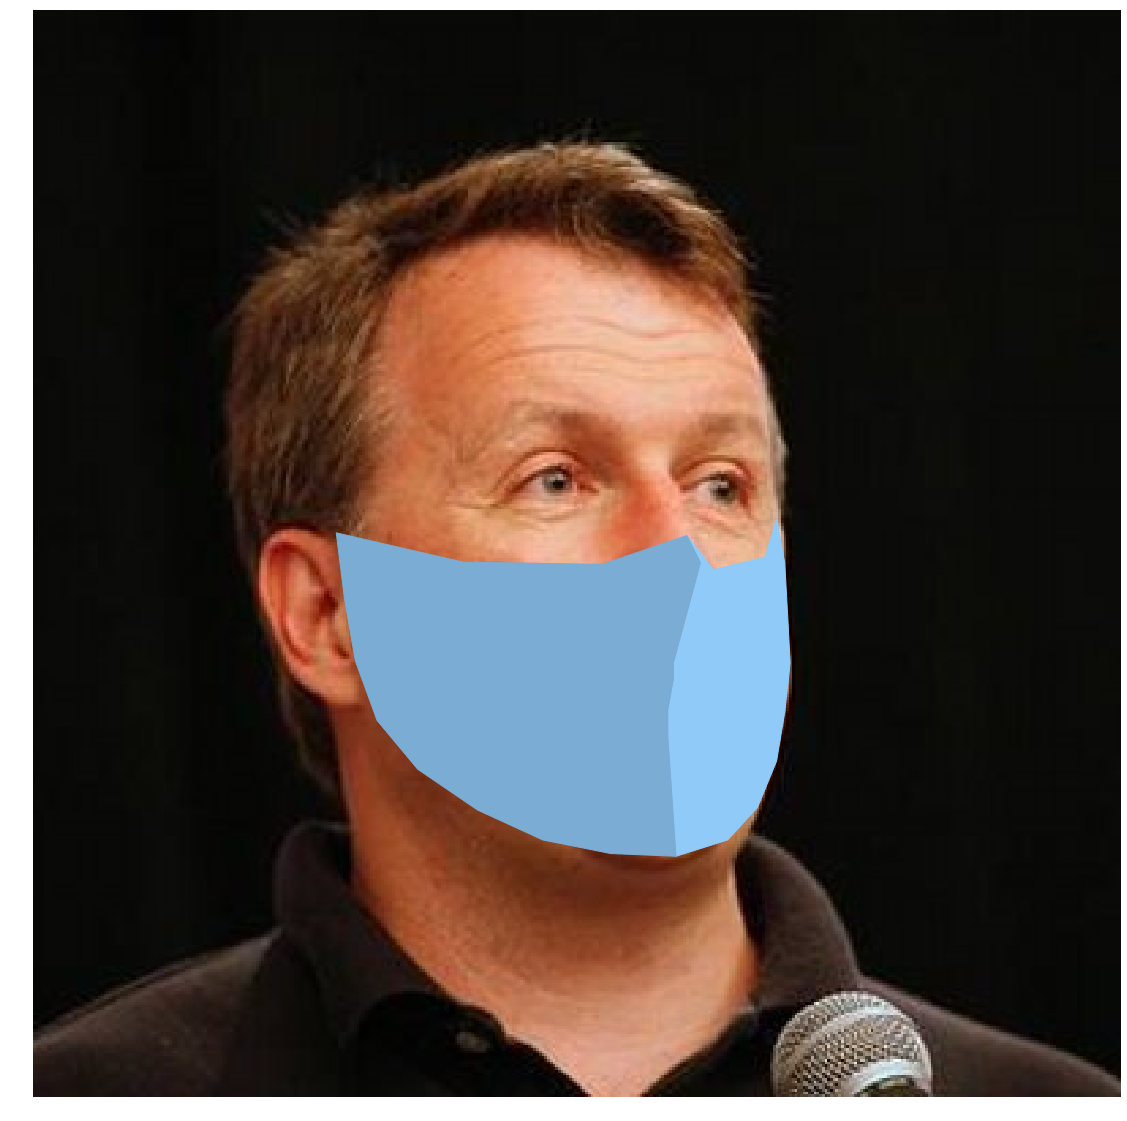

In [211]:
img = 'pg_1.jpg'
image = cv2.imread(img)

landmarks = face_detection(image)
left_mask, right_mask = build_mask(landmarks[0])



fig = plt.figure(figsize=(20,20))
plt.imshow(image[:, :, [2, 1, 0]]) # BGR

plt.fill(right_mask[:,0], right_mask[:,1], color=np.array([144, 202, 249])/255 )
plt.fill(left_mask[:,0], left_mask[:,1], color=np.array([144, 202, 249])/300 )

plt.savefig('test.png', fig=fig)
plt.axis('off')
    
plt.show()

